## **1. HugingFace link**

link hugingface : https://huggingface.co/spaces/antonio1206/ml2

>Nama :   Antonius Dwiputra Daeng<br>
>Batch      :   HCK-008<br>
>Dataset    :   winequalityN.csv<br>
>Link Dataset  : https://www.kaggle.com/datasets/rajyellow46/wine-quality/data <br><br>
>Objective  : Tujuan dari MILESTONE ini adalah untuk membuat sebuah model klasifikasi yang mampu memprediksi Quality dari Wine, apakah wine tersebut berkualitas LOW atau HIGHT.

# **2. Import Libraries**

> Berikut ini adalah library-library yang umumnya digunakan dalam proyek analisis data dan pembuatan model machine learning untuk membantu membaca, memproses, menganalisis, dan mengatasi masalah khusus seperti ketidakseimbangan kelas dan pencilan dalam data.

#
*LIBRARY*

In [ ]:
# Library untuk manipulasi dan analisis data
import pandas as pd
import numpy as np

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk mengatasi Outliers
from feature_engine.outliers import Winsorizer

# Library untuk menangani Class Imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Library untuk pembagian dataset
from sklearn.model_selection import train_test_split

# Library untuk penskalaan fitur dan pengkodean label
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Library untuk algoritma klasifikasi
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Library untuk pembuatan aliran kerja (pipeline) dan validasi model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

# Library untuk metrik evaluasi model
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
)

# Library untuk penyimpanan model
import pickle

# Library untuk mengendalikan peringatan
import warnings
warnings.filterwarnings("ignore")

print("Import Libraries Telah Berhasil!")


# **3. Data Loading**

> Ini adalah langkah di mana data diambil dari sumbernya. Data yang diambil mungkin memerlukan beberapa transformasi awal, seperti menghilangkan atau mengisi nilai-nilai yang hilang, menggabungkan beberapa sumber data, atau merapihkan data. Mungkin juga perlu melakukan beberapa manipulasi awal seperti pemfilteran, penyusunan ulang, atau pembersihan tambahan sebelum mulai menganalisisnya.

#
*Data Loading*

In [108]:
wine = pd.read_csv('winequalityN.csv')
# print 5 data awal
wine.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [109]:
# print 5 data akhir
wine.tail(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [111]:
# menghitung jumlah value pada colom type
tipe = wine['type'].value_counts()
tipe

type
white    4898
red      1599
Name: count, dtype: int64

> karena target dari projek saya adalah collom quality, tapi untuk collom type saya ingin melakukan sedikit pendekatan yang berbeda dimana saya akan menggunakan type data white saja pada projek ini, karena jumlahnya yang lebih banyak. kenapa saya tidak menggunakan red dan white? itu karena saya ingin lebih memfokuskan projek saya pada penentuan quality. jika pada akhir nanti hasil dari prediksi memang buruk, saya akan meninjau kembali untuk menggunakan kedua type

In [112]:
# Memfilter DataFrame untuk hanya mengambil data jenis wine putih ('white')
wine = wine[wine['type'] == 'white']

In [113]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4898 non-null   object 
 1   fixed acidity         4890 non-null   float64
 2   volatile acidity      4891 non-null   float64
 3   citric acid           4896 non-null   float64
 4   residual sugar        4896 non-null   float64
 5   chlorides             4896 non-null   float64
 6   free sulfur dioxide   4898 non-null   float64
 7   total sulfur dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4891 non-null   float64
 10  sulphates             4896 non-null   float64
 11  alcohol               4898 non-null   float64
 12  quality               4898 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 535.7+ KB


In [114]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4890.000000,4891.000000,4896.000000,4896.000000,4896.000000,4898.000000,4898.000000,4898.000000,4891.000000,4896.000000,4898.000000,4898.000000
mean,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,5.877909
std,0.843808,0.100811,0.120985,5.072275,0.021850,17.007137,42.498065,0.002991,0.151014,0.114147,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [115]:
wine.isnull().sum()

type                    0
fixed acidity           8
volatile acidity        7
citric acid             2
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      7
sulphates               2
alcohol                 0
quality                 0
dtype: int64

In [116]:
wine.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [117]:
# Mengganti label kolom DataFrame wine dengan nama-nama kolom baru
wine.columns = ['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
              'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
              'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
              'quality']

saya mendrop colom type dengan alasan, karena dataset yang saya gunakan untuk saat ini sudah pasti bertipe white semua

In [118]:
# Membuat DataFrame 'df' yang hanya berisi kolom-kolom fitur yang akan digunakan dalam analisis atau pemodelan
df = wine[['fixed_acidity', 'volatile_acidity', 'citric_acid',
              'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
              'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
              'quality']]

In [148]:
# Menampilkan 10 baris awal dari dataFrame 'df'
df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6
10,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5
11,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,5
12,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,5
13,6.6,0.16,0.40,1.50,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7


In [121]:
df.duplicated().sum()

928

In [122]:
df = df.drop_duplicates()

In [149]:
df.duplicated().sum()

0

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3970 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3962 non-null   float64
 1   volatile_acidity      3963 non-null   float64
 2   citric_acid           3968 non-null   float64
 3   residual_sugar        3968 non-null   float64
 4   chlorides             3968 non-null   float64
 5   free_sulfur_dioxide   3970 non-null   float64
 6   total_sulfur_dioxide  3970 non-null   float64
 7   density               3970 non-null   float64
 8   pH                    3963 non-null   float64
 9   sulphates             3968 non-null   float64
 10  alcohol               3970 non-null   float64
 11  quality               3970 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 403.2 KB


pada awalnya data ini terdapat 13 kolom, dengan type collom sebagai berikut : float64 berjumlah 11, int64berjumlah 1 dan collom object berjumlah 1. ukuran dataset 660.0+ KB.
pada awalnya jumlah rows 6497 dan 13 columns, akan tetapi untuk melanjutkan projek saya, saya memutuskan hanya menggunakan white `type` sehingga saya memilih data jenis white saja.
sisa data setelah saya melakukan pemilihan type ini berjumlah : 4898 baris,
setelah itu saya menemukan duplicate data jadi data yang duplicate saya drop dengan alasan akan mengganggu model nantinya dalam mempelajari data.
setelah duplicate di drop, jumlah baris data menjadi 3970.

In [150]:
data = df.copy()

 # **4. Exploratory Data Analysis (EDA)**

> Exploratory Data Analysis (EDA) adalah proses yang dilakukan pada data untuk memahami karakteristiknya dan mendapatkan wawasan awal sebelum menjalankan analisis statistik yang lebih mendalam atau membangun model prediktif.

## **1. Melihat distribusi `Quality` dalam bentuk Pie Chart**

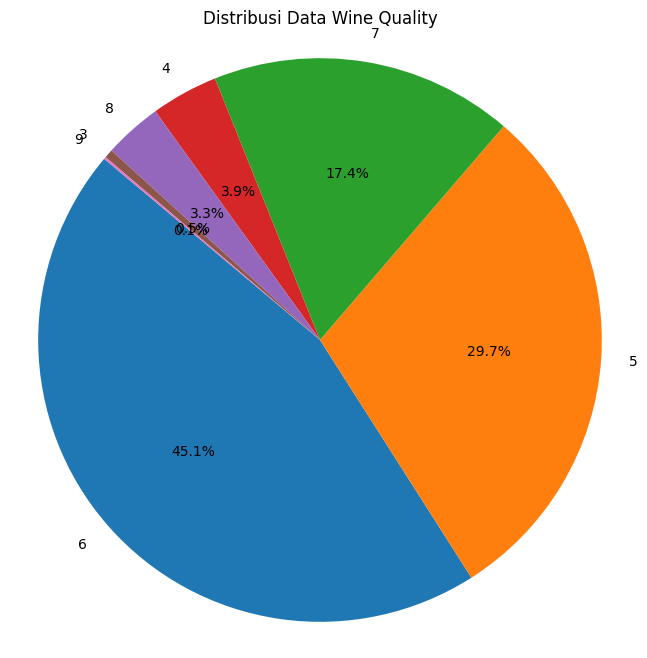

quality
6    45.138539
5    29.672544
7    17.380353
4     3.853904
8     3.324937
3     0.503778
9     0.125945
Name: proportion, dtype: float64


In [131]:
quality_counts = data['quality'].value_counts()
percentage_counts = data['quality'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Data Wine Quality')
plt.axis('equal') 
plt.show()
print(percentage_counts)

pada visualisasi diatas dapat dilihat bahwa quality dengan angka 6 mempunyai distribusi yang paling tinggi dengan 45.1% dan quality dengan angka 9 mempunyai distribusi yang paling rendah dengan persentase 0.1% 

## **2. Melihat rata-rata kandungan sulfur dioksida `free_sulfur_dioxide` dalam anggur berdasarkan `quality`**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


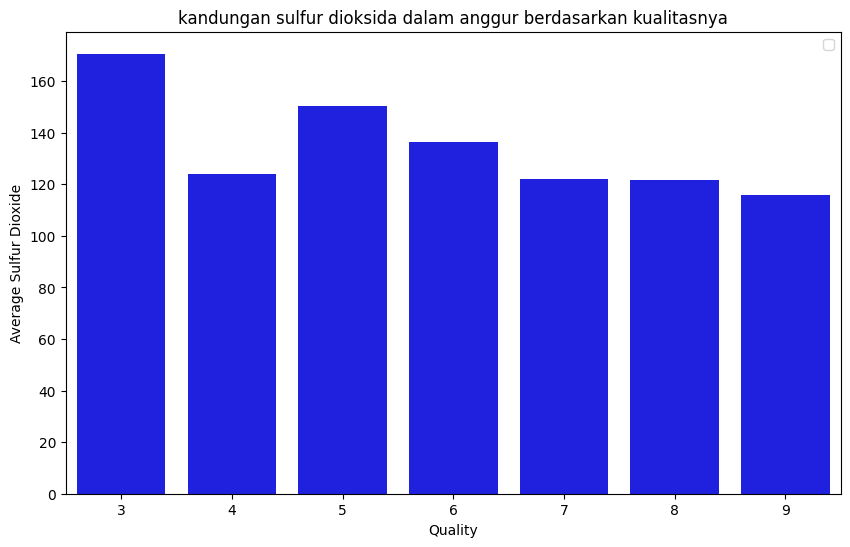

   quality  free_sulfur_dioxide  total_sulfur_dioxide
0        3            53.325000            170.600000
1        4            23.127451            124.127451
2        5            36.002971            150.143463
3        6            35.332589            136.526786
4        7            33.908696            122.186232
5        8            35.568182            121.678030
6        9            33.400000            116.000000


In [136]:
average_sulfur = data.groupby('quality')[['free_sulfur_dioxide', 'total_sulfur_dioxide']].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='total_sulfur_dioxide', data=average_sulfur, color='blue')
plt.xlabel('Quality')
plt.ylabel('Average Sulfur Dioxide')
plt.title('kandungan sulfur dioksida dalam anggur berdasarkan kualitasnya')
plt.legend()
plt.show()
print(average_sulfur)

dapat dilihat bahwa total quality 3 memiliki kandungan sulfur yang paling tinggi dengan **170.60000** dan yang paling rendah adalah quality 9 dengan dengan jumlah **116.000000**

## **3. membandingkan rata-rata `volatile_acidity` dengan kualitas anggur `quality`**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


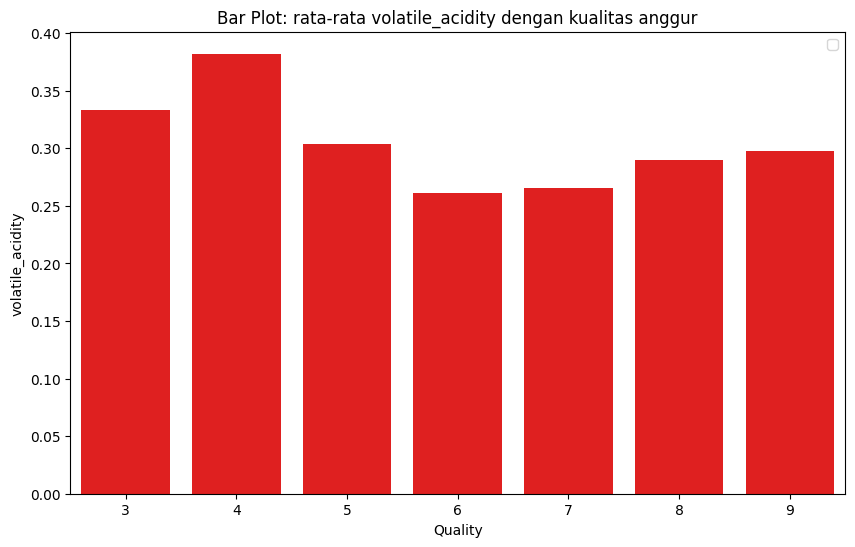

   quality  volatile_acidity
0        3          0.333250
1        4          0.382157
2        5          0.303397
3        6          0.261607
4        7          0.265283
5        8          0.289621
6        9          0.298000


In [137]:
average_volatile = data.groupby('quality')['volatile_acidity'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='volatile_acidity', data=average_volatile, color='red')
plt.xlabel('Quality')
plt.ylabel('volatile_acidity')
plt.title('Bar Plot: rata-rata volatile_acidity dengan kualitas anggur')
plt.legend()
plt.show()
print(average_volatile)

dapat dilihat bahwa total quality 6 memiliki kandungan asam asetat yang paling rendah dengan **0.261607** dan yang paling tinggi adalah quality 4 dengan dengan jumlah **0.382157**

## **4. apakah kandungan `alcohol` mempengaruhi `quality` anggur**

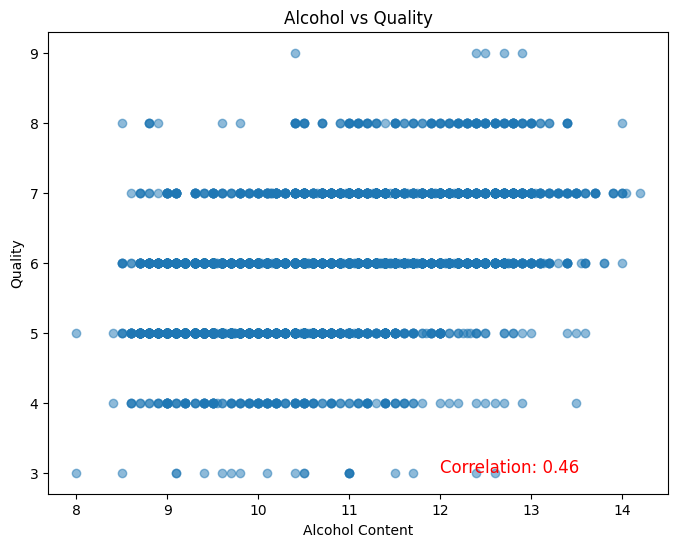

In [138]:
x = data['alcohol']  
y = data['quality']  

correlation = data['alcohol'].corr(data['quality'])

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Alcohol vs Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality')
plt.text(12, 3, f'Correlation: {correlation:.2f}', fontsize=12, color='red')
plt.show()



nilai korelasi antara alcohol terhadap quality adalah 0.46

## **5. distribusi kandungan asam sitrat `citric_acid` untuk setiap kategori kualitas anggur `quality`**

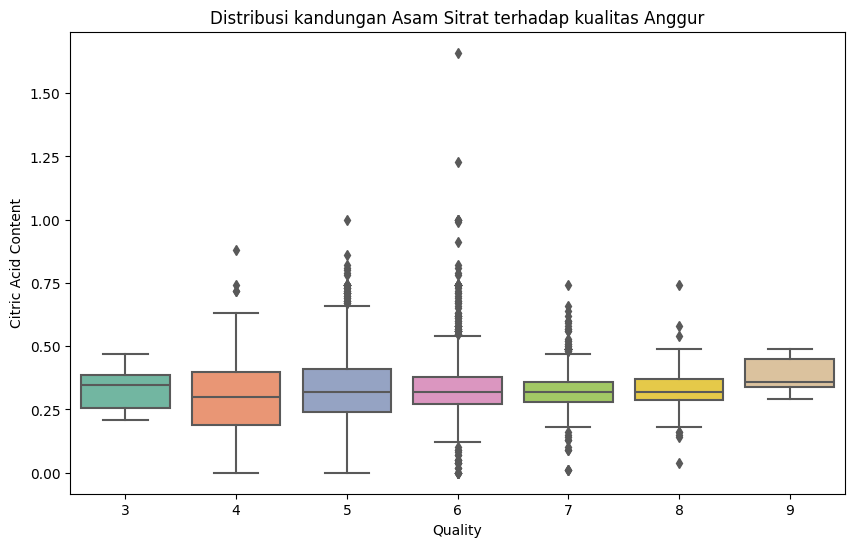

In [140]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='citric_acid', data=data, palette='Set2')
plt.xlabel('Quality')
plt.ylabel('Citric Acid Content')
plt.title('Distribusi kandungan Asam Sitrat terhadap kualitas Anggur')
plt.show()


Distribusi kandungan Asam Sitrat pada quality 6 terhadap kualitas Anggur dilihat sangat tinggi 

## **6. melihat distribusi kandungan sulfat `sulphates` untuk setiap kategori kualitas anggur `quality`**

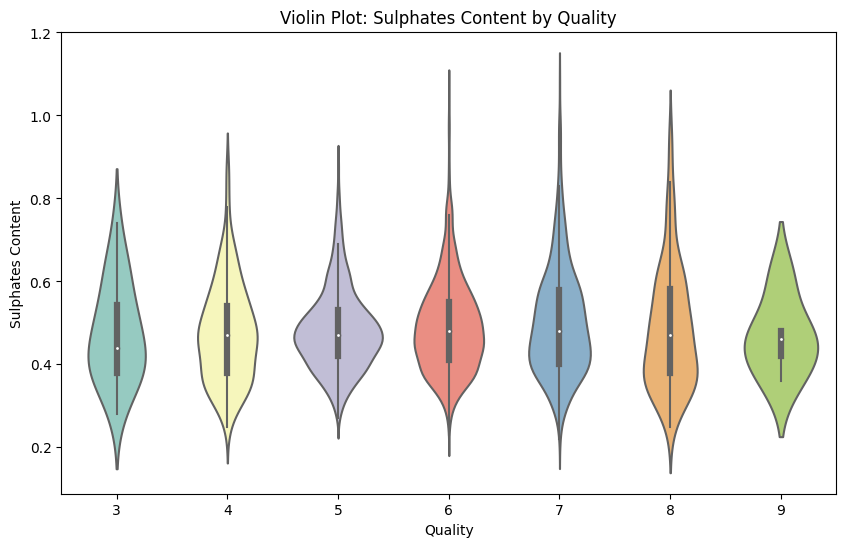

In [141]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='sulphates', data=data, palette='Set3')
plt.xlabel('Quality')
plt.ylabel('Sulphates Content')
plt.title('Violin Plot: Sulphates Content by Quality')
plt.show()

# <br>

# **5. Feature Engineering**

> Pada bagian Feature engineering saya mengharapkan bisa membuat, mengubah, atau memilih fitur (variables) dari data yang akan digunakan untuk melatih model machine learning. Tujuannya adalah untuk meningkatkan kualitas dan performa model yang akan saya bangun dengan menggunakan fitur yang paling relevan.

#

## **1. Cardinality Analysis**

#### **CEK KARDINALITY**

In [151]:
print('quality    : {}'.format(len(data.quality.unique())))


quality    : 7


> INSIGHT : Dari Feature categorical , bisa dilihat bahwa datanya hanya berjumlah 7 kategori.

In [152]:
data['quality'].value_counts()

quality
6    1792
5    1178
7     690
4     153
8     132
3      20
9       5
Name: count, dtype: int64

#### **ENCODING**

In [153]:
bins = (3, 4.5, 9)
group_names = ['low', 'hight']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [154]:
data['quality'].unique()

['hight', 'low', NaN]
Categories (2, object): ['low' < 'hight']

In [155]:
label_quality = LabelEncoder()
data['quality'] = label_quality.fit_transform(data['quality'])

In [156]:
data['quality'].value_counts()

quality
0    3797
1     153
2      20
Name: count, dtype: int64

In [157]:
# Menghapus baris dengan 'quality' equal to 2 atau quality nan
data = data[data['quality'] != 2]
quality_counts = data['quality'].value_counts()

print(quality_counts)

quality
0    3797
1     153
Name: count, dtype: int64


In [158]:
data1 = data.copy()

## **2.  Handling Mising Value**

In [162]:
mising_value = data1.copy()

In [164]:
isNull = mising_value.isnull().sum().to_frame(name='isNull').T
isNa = mising_value.isna().sum().to_frame(name='isNa').T
Unique = mising_value.nunique().to_frame(name='Unique').T
summary = pd.concat([Unique, isNa, isNull])
summary

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Unique,67,124,87,310,159,128,246,889,103,79,103,2
isNa,8,7,2,2,2,0,0,0,7,2,0,0
isNull,8,7,2,2,2,0,0,0,7,2,0,0


In [165]:
mising_value = mising_value.dropna()

In [166]:

isNull = mising_value.isnull().sum().to_frame(name='isNull').T
isNa = mising_value.isna().sum().to_frame(name='isNa').T
Unique = mising_value.nunique().to_frame(name='Unique').T
summary = pd.concat([Unique, isNa, isNull])
summary

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Unique,67,124,87,309,159,128,246,888,103,79,103,2
isNa,0,0,0,0,0,0,0,0,0,0,0,0
isNull,0,0,0,0,0,0,0,0,0,0,0,0


## **3. Split Between X (Features) and y (Target)**

In [167]:
split = mising_value.copy()

#### **Splitting between X and y**

In [168]:
X = split.drop(['quality'], axis = 1)
y = split['quality']
y

0       0
1       0
2       0
3       0
6       0
       ..
4891    0
4893    0
4894    0
4896    0
4897    0
Name: quality, Length: 3922, dtype: int32

#### **Split Between Train-set and Test-set**

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## **4. Handling Outliers**

In [171]:
def check_skew(X_train):
    data_numerik_normal = []
    data_numerik_non_normal = []
    
    for i in X_train.columns:
        skewness = X_train[i].skew()
        
        if (skewness >=0.5) | (skewness <=-0.5):
            data_numerik_non_normal.append(i)

        elif (skewness<0.5) & (skewness >=-0.5):
            data_numerik_normal.append(i)
        
        print(f"Skewness dari {i} adalah {skewness}")
    
    return data_numerik_normal, data_numerik_non_normal

# Melihat nilai skewness keseluruhan dengan memanggil fungsi check_skew
data_numerik_normal, data_numerik_non_normal = check_skew(X_train)

Skewness dari fixed_acidity adalah 0.6594038347740961
Skewness dari volatile_acidity adalah 1.6459616817708866
Skewness dari citric_acid adalah 1.309285166651494
Skewness dari residual_sugar adalah 1.4552179822415092
Skewness dari chlorides adalah 5.166060846237061
Skewness dari free_sulfur_dioxide adalah 0.6858068215450808
Skewness dari total_sulfur_dioxide adalah 0.3173546760209332
Skewness dari density adalah 1.4904845675103013
Skewness dari pH adalah 0.4461921451866691
Skewness dari sulphates adalah 0.9391844894683858
Skewness dari alcohol adalah 0.46789462348110544


In [172]:
print(f'data numerik normal :{data_numerik_normal}')
print(f'data numerik non normal :{data_numerik_non_normal}')

data numerik normal :['total_sulfur_dioxide', 'pH', 'alcohol']
data numerik non normal :['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'density', 'sulphates']


In [173]:
# caping data numerik normal
Capping_normal = Winsorizer(capping_method='gaussian', 
                            tail='both', 
                            fold=3, 
                            variables=data_numerik_normal)

Capping_normal = Capping_normal.fit_transform(X_train[data_numerik_normal])


# caping data numerik non normal
Capping_non_normal = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=data_numerik_non_normal, missing_values='ignore')
Capping_non_normal = Capping_non_normal.fit_transform(X_train[data_numerik_non_normal])


# concat
clean_X = pd.concat([Capping_normal, Capping_non_normal], axis=1)

clean_y = y_train

In [174]:
data_caped = pd.concat([clean_y,clean_X],axis = 1)

data_caped

,quality,total_sulfur_dioxide,pH,alcohol,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,sulphates
1057,0,197.0,3.41,9.0,7.2,0.510,0.24,10.00,0.093,35.0,0.99810,0.47
1298,0,163.0,3.30,12.4,7.3,0.340,0.39,5.20,0.040,45.0,0.99250,0.47
3494,0,123.0,3.34,10.9,6.7,0.240,0.36,8.40,0.042,42.0,0.99473,0.52
1695,0,132.0,3.25,11.0,7.2,0.210,0.33,3.00,0.036,35.0,0.99280,0.40
1372,0,181.0,2.87,9.5,10.3,0.220,0.56,8.20,0.044,37.0,0.99800,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...
1362,0,115.0,3.19,11.3,6.4,0.250,0.33,1.40,0.040,42.0,0.99060,0.48
1566,0,158.0,3.06,9.2,7.6,0.180,0.49,18.05,0.046,36.0,0.99960,0.41
1045,0,92.0,3.14,10.5,7.3,0.150,0.40,2.00,0.050,24.0,0.99320,0.45
4404,0,197.0,3.21,9.4,5.9,0.290,0.16,7.90,0.044,48.0,0.99512,0.36


In [ ]:
X_test_fix = X_test

In [238]:
X_test_fix_copy = X_test

In [290]:
caped_copy = data_caped.copy()

## **5. balancing data**

In [291]:
print("Jumlah kelas sebelum SMOTE:")
print(y_train.value_counts())

Jumlah kelas sebelum SMOTE:
quality
0    3013
1     124
Name: count, dtype: int64


In [292]:
X_train_under = X_train
y_train_under = y_train

In [293]:

undersampler = RandomUnderSampler(sampling_strategy=1.0, random_state=0)

X_train_balance, y_train_balance = undersampler.fit_resample(X_train_under, y_train_under)

In [294]:
# Create dataframe
X_train_balance = pd.DataFrame(X_train_balance)
y_train_balance = pd.DataFrame(y_train_balance)

In [295]:
# Displaying values after SMOTE
print("Jumlah kelas sesudah SMOTE:")
print(y_train_balance.value_counts())

Jumlah kelas sesudah SMOTE:
quality
0          124
1          124
Name: count, dtype: int64


saya memilih untuk menggunakan original data dari pada memaksakan data untuk di RandomOverSampler. karena inbalnce data yang terlalu jauh

## **6. Feature Selection**

> dari pemahaman saya tentang bisnis minuman seperti WINE, saya mengetahui bahwa collom-collom diatas sangat berpengaruh terhadap kualitas dari minuman WINE. jika di cek korelasi dan nilainya rendah saya tetap mengambil colom tersebut karena kegunaanya yang diperlukan untuk bisnis. tapi disini saya tidak melakukan visualisasi karena untuk menghemat waktu dan cara pengerjaan

# **6. Model Definition**

> Model Definition adalah tahap awal dalam membangun model prediksi atau klasifikasi. Ini adalah saat di mana peneliti merencanakan jenis model yang akan digunakan, mengatur parameter dasarnya, dan mempersiapkan data. 

#

### **Pipeline model**

#### Inisialisasi Model Dasar

In [296]:
models = [
    KNeighborsClassifier(),
    SVC(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42)
]

#### Model Training dengan Cross Validation

In [297]:
def make_pipeline(model):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

model_names = ['KNN', 'SVM', 'Decision Tree', 'Random Forest', 'AdaBoost']

for idx, model in enumerate(models):
    model_pipeline = make_pipeline(model)
    scores_under = cross_val_score(model_pipeline, X_train_balance, y_train_balance, cv=5, scoring="recall")
    print(f"------- {model_names[idx]} -------")
    print(f"Recall Score - Mean - Cross Validation: {scores_under.mean()}")
    print(f"Recall Score - Std - Cross Validation: {scores_under.std()}")
    print(f'Recall Score - Range of T-Set: {(scores_under.mean()-scores_under.std())} - {(scores_under.mean() + scores_under.std())}')


------- KNN -------
Recall Score - Mean - Cross Validation: 0.6126666666666667
Recall Score - Std - Cross Validation: 0.13584959002923458
Recall Score - Range of T-Set: 0.4768170766374321 - 0.7485162566959013
------- SVM -------
Recall Score - Mean - Cross Validation: 0.7256666666666668
Recall Score - Std - Cross Validation: 0.12520028398973826
Recall Score - Range of T-Set: 0.6004663826769285 - 0.850866950656405
------- Decision Tree -------
Recall Score - Mean - Cross Validation: 0.572
Recall Score - Std - Cross Validation: 0.07756287771866126
Recall Score - Range of T-Set: 0.4944371222813387 - 0.6495628777186612


------- Random Forest -------
Recall Score - Mean - Cross Validation: 0.7096666666666668
Recall Score - Std - Cross Validation: 0.11696343208218732
Recall Score - Range of T-Set: 0.5927032345844795 - 0.8266300987488541
------- AdaBoost -------
Recall Score - Mean - Cross Validation: 0.647
Recall Score - Std - Cross Validation: 0.1593612248948909
Recall Score - Range of T-Set: 0.4876387751051091 - 0.8063612248948909


# **7. Model Training**

> Model training adalah proses berulang yang memerlukan pemahaman yang baik tentang algoritma pembelajaran mesin, pemrosesan data, dan evaluasi model. Tujuannya adalah mengembangkan model yang dapat melakukan tugas tertentu dengan akurasi dan kinerja yang baik pada data yang tidak pernah dilihat sebelumnya.

# <br>

### **Hyperparameter Tuning**

In [298]:
# Buat pipeline baru dengan Random Forest
random_forest_pipeline = make_pipeline(RandomForestClassifier(random_state=42))

# Tentukan parameter distribusi untuk RandomizedSearchCV
param_dist = {
    'classifier__n_estimators': [100, 200, 300],  
    'classifier__max_depth': [None, 1, 10, 20],
    'classifier__min_samples_split': [2, 5, 10, 15],
    'classifier__min_samples_leaf': [1, 2, 5, 10],
    'classifier__bootstrap': [True, False]
}

# Inisialisasi RandomizedSearchCV
random_search_rf = RandomizedSearchCV(random_forest_pipeline, param_distributions=param_dist, n_iter=50, 
                                   cv=5, scoring='recall', n_jobs=-1, verbose=3, random_state=42)
random_search_rf.fit(X_train, y_train)

# Dapatkan parameter terbaik dari RandomizedSearchCV
best_params_random_rf = random_search_rf.best_params_

print("Best RF Parameters from RandomCV:", best_params_random_rf)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Best RF Parameters from RandomCV: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None, 'classifier__bootstrap': False}


In [299]:
random_forest_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [300]:
best_rf = RandomForestClassifier(n_estimators=best_params_random_rf['classifier__n_estimators'],
                                 max_depth=best_params_random_rf['classifier__max_depth'],
                                 min_samples_split=best_params_random_rf['classifier__min_samples_split'],
                                 min_samples_leaf=best_params_random_rf['classifier__min_samples_leaf'],
                                 bootstrap=best_params_random_rf['classifier__bootstrap'],
                                 random_state=42)

In [301]:
best_rf

RandomForestClassifier(bootstrap=False, min_samples_split=5, random_state=42)

In [302]:
# Membuat pipeline dengan langkah-langkah yang terdefinisikan
best_rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Pra-pemrosesan data
    ('classifier', best_rf)  # Estimator model
])

# Melakukan prediksi pada data uji
best_rf_pipeline.fit(X_train_balance, y_train_balance)

# Melakukan prediksi pada data latih
y_train_pred_rf = best_rf_pipeline.predict(X_train_balance)

# Melakukan prediksi pada data uji
y_test_pred_rf = best_rf_pipeline.predict(X_test_fix)

In [303]:
y_test_pred_rf

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,

# **8. Model Evaluation**

> Evaluasi model adalah proses mengukur sejauh mana kinerja model pembelajaran mesin sesuai dengan tujuan yang diinginkan. Ini melibatkan penggunaan berbagai metrik dan teknik untuk menilai seberapa baik model tersebut melakukan prediksi terhadap data yang belum terlihat. 

# <br>

In [304]:
# Evaluate the model on the training set
recall_train_rf = recall_score(y_train_balance, y_train_pred_rf)
print("RF Recall Score (Train):", recall_train_rf)

# Evaluate the model on the test set
recall_test_rf = recall_score(y_test, y_test_pred_rf)
print("\nRF Recall Score (Test):", recall_test_rf)

RF Recall Score (Train): 1.0

RF Recall Score (Test): 0.7857142857142857


Dari nilai *`recall`* di atas, bisa diinterpretasikan bahwa:
- Untuk  train, model mampu mengidentifikasi 100% dari semua kasus yang sebenarnya .
- Untuk test , model mampu mengidentifikasi 78% dari semua kasus yang sebenarnya .


In [305]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_rf)
print(f"\nConfusion Matrix: \n{cm}")

# Classification report
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_rf))


Confusion Matrix: 
[[602 155]
 [  6  22]]

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.99      0.80      0.88       757
           1       0.12      0.79      0.21        28

    accuracy                           0.79       785
   macro avg       0.56      0.79      0.55       785
weighted avg       0.96      0.79      0.86       785



dari report bisa dilihat bahwa accuracy yang dihasilkan oleh model sebesar 79% untuk memprediksi tipe wine (*low*)

In [306]:
# Evaluate the model on the training set

total_error_train_rf = len(y_train_balance) - (len(y_train_balance) * recall_train_rf)
error_percentage_train_rf = (total_error_train_rf / len(y_train_balance)) * 100

print("Total Errors (Train):", total_error_train_rf)
print("Error Percentage (Train): {:.2f}%".format(error_percentage_train_rf))

# Evaluate the model on the test set
total_error_test_rf = len(y_test) - (len(y_test) * recall_test_rf)
error_percentage_test_rf = (total_error_test_rf / len(y_test)) * 100

print("\nTotal Errors (Test):", total_error_test_rf)
print("Error Percentage (Test): {:.2f}%".format(error_percentage_test_rf))

Total Errors (Train): 0.0
Error Percentage (Train): 0.00%

Total Errors (Test): 168.21428571428578
Error Percentage (Test): 21.43%


pada hasil *`train`* tidak terjadi eror sedangkan pada hasil dari *`test`* terjadi eror sebesar 21%

Confusion Matrix (Train):
 [[124   0]
 [  0 124]]

Confusion Matrix (Test):
 [[602 155]
 [  6  22]]


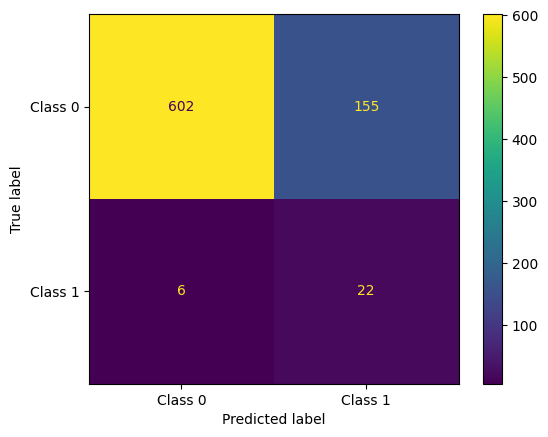

In [307]:
# Matriks untuk data pelatihan

confusion_matrix_train_rf = confusion_matrix(y_train_balance, y_train_pred_rf)
print("Confusion Matrix (Train):\n", confusion_matrix_train_rf)

# Matriks kebingungan untuk data pengujian

confusion_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)
print("\nConfusion Matrix (Test):\n", confusion_matrix_test_rf)

# Calculate confusion matrix for test data
confusion_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test_rf, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='viridis')
plt.show()

# **9. Model Saving**

 > Proses mengambil model pembelajaran mesin yang telah dilatih dan menyimpannya ke dalam file atau struktur data yang dapat digunakan nanti tanpa perlu melatih ulang model tersebut.

# <br>

y_test_pred_rf
best_rf_pipeline

In [310]:
with open('best_rf_pipeline.pkl', 'wb') as file:
    pickle.dump(best_rf_pipeline, file)

In [311]:
with open('column_names.txt', 'w') as file:
    for column_name in X.columns:
        file.write(column_name + '\n')

# **10. Pengambilan Kesimpulan**

setelah melakukan predict untuk menentukan kualitas wine, saya akhirnya bisa membuat kesimpulan bahwa data yang bagus sangat dibutuhkan untuk melakukan predict dengan hasil yang maksimal.

hasil dari prediksi ini masih bisa dikatakan berhasil karena persentase keberhasilan sudah mendekati 100% dan tidak dibawah 70%.

pada awalnya saya menggunakan 2 cara untuk melakukan balancing data, tapi karena dari hasilnya kelihatan bahwa cara yang ke-2 tidaklah optimal karena hasil predicknya semuanya mendapatkan hasil 100%. jadi saya ber amsumsi ada kesalahan yang berasal dari saya sebagai seorang yang melakukan penelitian, sehingga saya lebih memilih menggunakan yang sudah saya pakai diatas walaupun hasilnya tidak benar-benar tinggi tapi saya sudah puas.